# 점추정 부분

In [1]:
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import math
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

if os.name=='nt':
    font_family = 'Malgun Gothic'
else:
    font_family = 'AppleGothic'
    
sns.set(font=font_family, rc={'axes.unicode_minus' : False})

In [2]:
np.random.seed(10)

math_score = pd.DataFrame(np.random.randint(25,101,size=500), columns=['점수'])

In [3]:
math_score.describe()

,점수
count,500.00000
mean,60.88200
std,22.31816
min,25.00000
25%,41.00000
50%,59.00000
75%,80.00000
max,100.00000


In [4]:
scores = np.array(math_score['점수'])
scores[:5]

array([34, 40, 89, 53, 54])

In [5]:
sample = np.random.choice(scores, 20)
print(sample)
print(sample.mean())
print(sample.var())
print(sample.std())

[ 76  73  37  57  47  48  35  28  79  57  40  31  44  52  87 100  33  64
  25  41]
52.7
422.50999999999993
20.555048041782825


In [6]:
for i in range(10):
    sample1 = np.random.choice(scores, 20)
    print(i+1, '표본평균', sample1.mean())

1 표본평균 51.8
2 표본평균 64.05
3 표본평균 63.0
4 표본평균 71.3
5 표본평균 67.9
6 표본평균 63.75
7 표본평균 56.2
8 표본평균 66.3
9 표본평균 54.7
10 표본평균 65.2


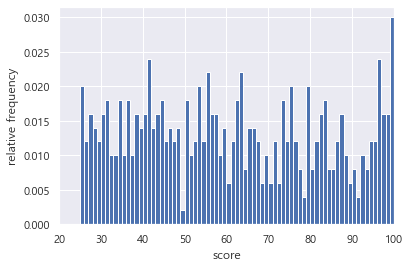

In [7]:
plt.xlabel('score')
plt.ylabel('relative frequency')
plt.hist(scores, bins=100, range=(0,100), density=True)
plt.xlim(20, 100)
plt.show()

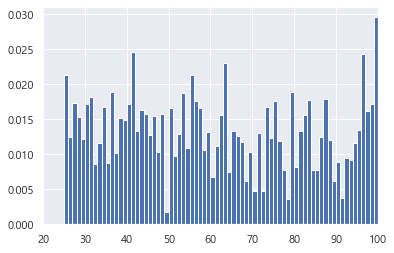

In [8]:
sample_score = np.random.choice(scores, 10000)

plt.hist(sample_score, bins=100, range=(0,100),density=True)
plt.xlim(20,100)
plt.show()

In [9]:
n = 20
nSample = 100

sample_mean = np.array([np.random.choice(scores, n,).mean() for i in range(nSample)])

In [10]:
sample_mean

array([62.15, 57.2 , 61.65, 54.05, 57.6 , 64.85, 64.45, 65.35, 54.45,
       61.6 , 68.75, 68.85, 66.1 , 62.85, 66.05, 77.15, 58.15, 57.35,
       60.85, 60.85, 62.05, 74.2 , 59.15, 62.25, 51.85, 66.5 , 53.65,
       63.25, 47.4 , 61.9 , 58.45, 57.2 , 56.75, 60.65, 63.  , 67.9 ,
       62.2 , 62.25, 66.2 , 52.85, 69.75, 61.5 , 59.15, 58.3 , 58.9 ,
       64.65, 63.55, 58.75, 61.5 , 52.7 , 64.2 , 57.85, 60.15, 60.8 ,
       63.25, 55.8 , 61.6 , 64.15, 62.25, 63.55, 62.8 , 57.85, 60.65,
       63.1 , 56.7 , 50.35, 58.1 , 64.35, 65.8 , 49.85, 66.  , 58.65,
       67.8 , 62.2 , 55.5 , 61.9 , 61.35, 62.35, 57.25, 54.6 , 57.7 ,
       53.7 , 65.35, 61.7 , 54.3 , 61.95, 64.55, 61.3 , 54.25, 58.7 ,
       66.75, 57.9 , 68.45, 57.9 , 63.25, 62.25, 58.7 , 61.25, 60.4 ,
       67.6 ])

In [11]:
print('모평균 : ', scores.mean())
print('표본평균의 평균 : ', sample_mean.mean())
print('모분산\/\n : ', scores.var()/n)
print('표본평균의 분산 : ', sample_mean.std())
print('표본오차 : ', scores.std()/math.sqrt(n))

모평균 :  60.882
표본평균의 평균 :  60.974000000000004
모분산\/
 :  24.8552038
표본평균의 분산 :  4.946678077255482
표본오차 :  4.985499353124018


# 구간추정

In [12]:
from scipy.stats import t
t_95 = t.ppf(1 - (1-0.95) / 2, df=20-1)
t_95

2.093024054408263

In [13]:
sMean = sample_mean.mean()
sStd = sample_mean.std()

Low_c = sMean - t_95 * (sStd / math.sqrt(n))
Upper_c = sMean + t_95 * (sStd / math.sqrt(n))
print(Low_c)
print(Upper_c)

print(f'신뢰구간 : {Upper_c - Low_c}')

58.6588833959229
63.28911660407711
신뢰구간 : 4.630233208154209


In [14]:
z_n = 30
sample1 = np.random.choice(scores, n)
z_sMean = sample1.mean()
z_sStd = sample1.std()

print('모평균', scores.mean())
print('표본평균', z_sMean)
print('모편차', scores.std())
print('표본편차', z_sStd)

모평균 60.882
표본평균 56.95
모편차 22.295830910733066
표본편차 21.941911949508867


In [15]:
z_95 = stats.norm.ppf(1 - (1-0.95)/2)

In [16]:
L_value_1 = round(z_sMean - z_95 * (scores.std()/math.sqrt(z_n)), 2)
U_value_1 = round(z_sMean + z_95 * (scores.std()/math.sqrt(z_n)), 2)

print(L_value_1)
print(U_value_1)

print(f'신뢰구간 : {U_value_1 - L_value_1}')

48.97
64.93
신뢰구간 : 15.960000000000008


In [18]:
mStd = 5
mMean = 205
n = 49

z_95_1 = stats.norm.ppf(1 - (1-0.95)/2)

L_value = round(mMean - z_95_1 * (mStd/math.sqrt(n)),2)
U_value = round(mMean + z_95_1 * (mStd/math.sqrt(n)),2)

print(f'신뢰구간 : {L_value} ~ {U_value}')
print(f'신뢰구간 길이 : {U_value - L_value}')

print('{} < {} < {}'.format(L_value, mMean, U_value))

신뢰구간 : 203.6 ~ 206.4
신뢰구간 길이 : 2.8000000000000114
203.6 < 205 < 206.4


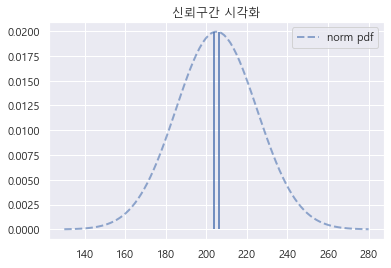

In [19]:
standard_norm = stats.norm(205, 20)

x = np.linspace(130, 280, 100)

plt.vlines(L_value, 0, standard_norm.pdf(L_value), colors="b")
plt.vlines(U_value, 0, standard_norm.pdf(U_value), colors="b")
plt.plot(x, standard_norm.pdf(x), 'b--', lw=2, alpha=0.6, label='norm pdf')

plt.title('신뢰구간 시각화')
plt.legend()
plt.show()